# Assignment 06 - CNN

In [50]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

In [52]:
# load train and test dataset
(trainX, trainy), (testX, testy) = tf.keras.datasets.fashion_mnist.load_data()

In [53]:
print(trainX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [54]:
trainy[0]

9

In [55]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


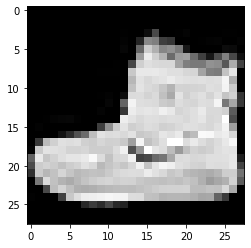

In [56]:
plt.imshow(trainX[0],cmap = 'gray')

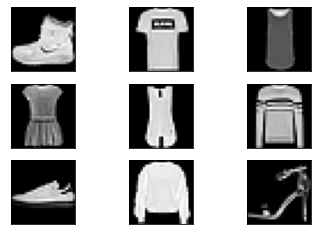

In [57]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

In [58]:
# scale pixels
trainX, testX = trainX / 255.0, testX / 255.0

In [59]:
trainy[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [60]:
# one hot encode target values
from tensorflow.keras.utils import to_categorical
trainy_oh = to_categorical(trainy)
testy_oh = to_categorical(testy)

In [61]:
trainy_oh[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [62]:
# define cnn model
model = models.Sequential()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [63]:
# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               540900    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [65]:
# fit model
history = model.fit(trainX, trainy_oh, epochs=10, 
                    validation_data=(testX, testy_oh))

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.3817 - accuracy: 0.8640 - val_loss: 0.3115 - val_accuracy: 0.8890
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2571 - accuracy: 0.9055 - val_loss: 0.2968 - val_accuracy: 0.8929
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2129 - accuracy: 0.9219 - val_loss: 0.2606 - val_accuracy: 0.9096
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1827 - accuracy: 0.9326 - val_loss: 0.2473 - val_accuracy: 0.9126
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1559 - accuracy: 0.9412 - val_loss: 0.2767 - val_accuracy: 0.9089
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1337 - accuracy: 0.9505 - val_loss: 0.2752 - val_accuracy: 0.9121
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1144 - accuracy: 0.9575 - val_loss: 0.2775 -

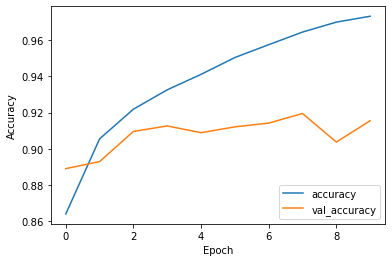

In [66]:
# plot diagnostic learning curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

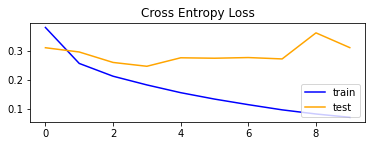

In [67]:
# plot diagnostic learning curves
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend(loc='lower right')